### Line search

Final optimized x: 1.0737418240000003


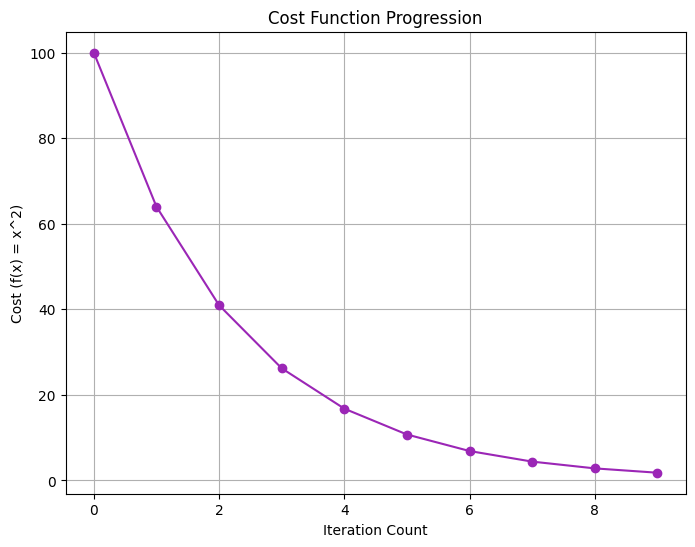

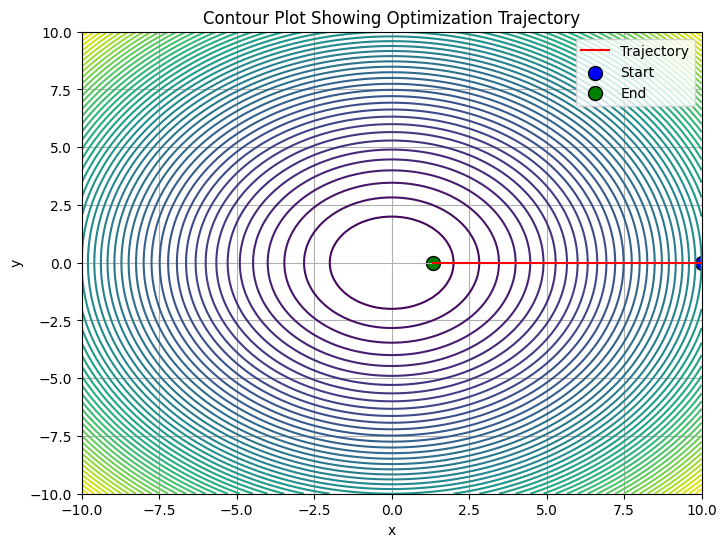

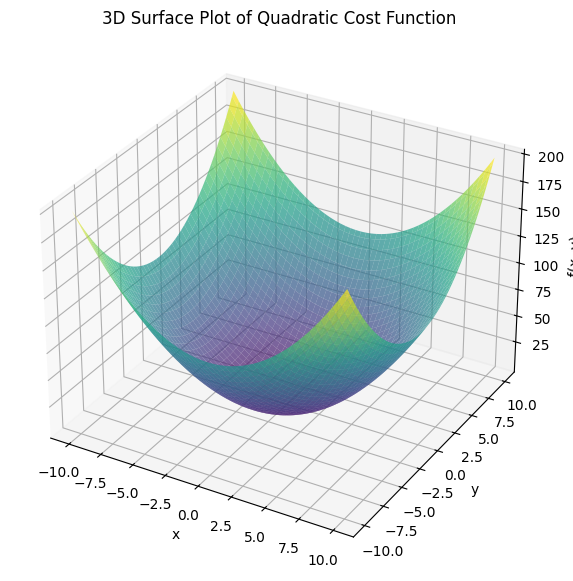

In [1]:
"""
 Line Search is a method used in optimization to find the best step size
 for each iteration of Gradient Descent. Instead of using a fixed step size,
 Line Search adaptively determines the optimal step size that minimizes
 the cost function along the direction of the gradient. The process involves:
 1. Starting with an initial guess for the variable(s).
 2. Computing the gradient at the current point.
 3. Executing a Line Search to find the optimal step size that minimizes
    the cost function in the direction of the negative gradient.
 4. Updating the variable(s) using this optimal step size.
 5. Repeating steps 2-4 until a specified number of iterations is reached
    or convergence is achieved.

"""
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class GradientDescentWithLineSearch:
    def __init__(self, learning_rate=0.1, max_iterations=100):
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.history_x = []
        self.history_cost = []

    def quadratic_cost_function(self, x):
        return x ** 2

    def compute_gradient(self, x):
        return 2 * x

    def optimize(self, starting_x):
        current_x = starting_x
        for _ in range(self.max_iterations):
            self.history_x.append(current_x)
            cost_value = self.quadratic_cost_function(current_x)
            self.history_cost.append(cost_value)

            gradient_value = self.compute_gradient(current_x)
            current_x -= self.learning_rate * gradient_value

        return current_x

# Plot the cost progression over iterations
def plot_cost_progression(history_cost):
    plt.figure(figsize=(8, 6))
    plt.plot(history_cost, color='#9B26B6', marker='o')
    plt.title('Cost Function Progression')
    plt.xlabel('Iteration Count')
    plt.ylabel('Cost (f(x) = x^2)')
    plt.grid(True)
    plt.show()

# Contour plot for visualizing optimization trajectory
def plot_contour_trajectory(history_x):
    x_vals = np.linspace(-10, 10, 100)
    y_vals = np.linspace(-10, 10, 100)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = X**2 + Y**2  # Using a 2D quadratic function as the cost

    plt.figure(figsize=(8, 6))
    plt.contour(X, Y, Z, levels=50, cmap='viridis')
    plt.plot(history_x, np.zeros(len(history_x)), 'r-', label='Trajectory')  # Trajectory on x-axis
    plt.scatter(history_x[0], 0, color='blue', label='Start', s=100, edgecolor='black')
    plt.scatter(history_x[-1], 0, color='green', label='End', s=100, edgecolor='black')
    plt.title("Contour Plot Showing Optimization Trajectory")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.show()

# 3D plot of the quadratic cost function
def plot_3d_cost_surface():
    x_vals = np.linspace(-10, 10, 100)
    y_vals = np.linspace(-10, 10, 100)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = X**2 + Y**2

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7, edgecolor='none')
    ax.set_title("3D Surface Plot of Quadratic Cost Function")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("f(x, y)")
    plt.show()

# Main execution
if __name__ == "__main__":
    optimizer = GradientDescentWithLineSearch(learning_rate=0.1, max_iterations=10)
    initial_value = 10
    final_x = optimizer.optimize(initial_value)

    print("Final optimized x:", final_x)

    # Plotting all three visualizations
    plot_cost_progression(optimizer.history_cost)
    plot_contour_trajectory(optimizer.history_x)
    plot_3d_cost_surface()
